In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
import json
from IPython.display import display, Image
from specutils import Spectrum1D
from astropy import units
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from astropy.time import Time
import datetime
#Import Supernovae class and relevant functions
from Supernovae import *

In [2]:
#Read in photometry file
hvw_photometry = pd.read_csv('../Data/16hvw_photometry/Marshal_lc.txt')

In [3]:
#Find indexes where photometry taken by P60
indexes = np.where(hvw_photometry['instrument'] == "P60+SED-Machine")

In [4]:
#Filter dataframe for elements taken by P60
P60_photometry = hvw_photometry.iloc[indexes]


In [5]:
#define function to grab items from df by filter
def grab_filter(DF, filt):
    indexes = np.where(DF['filter'] == filt)
    return DF.iloc[indexes]

def date_to_MJD(date):
    struct_time = [datetime.datetime.strptime(day,"%Y %b %d" ) for day in date]
    struct_time = Time(struct_time)
    struct_time.format = 'mjd'
    return struct_time.value


In [6]:
z_16hvw = .03663

MJD_max_16hvw = 57714.40

In [7]:
iPTF16hvw = Supernovae("iPTF16hvw" ,z_16hvw, MJD_max_16hvw)


In [17]:
#grab individual filters and store as Lightcurve objects
r_band = grab_filter(P60_photometry, 'r')
g_band = grab_filter(P60_photometry, 'g')
i_band = grab_filter(P60_photometry, 'i')
u_band = grab_filter(P60_photometry, 'u')

#Create Lightcurve objects out from data
iPTF16hvw.store_lightcurve(Lightcurve(date_to_MJD(r_band['date']), r_band['mag'], r_band['emag'], 'r'))
iPTF16hvw.store_lightcurve(Lightcurve(date_to_MJD(g_band['date']), g_band['mag'], g_band['emag'], 'g'))
iPTF16hvw.store_lightcurve(Lightcurve(date_to_MJD(i_band['date']), i_band['mag'], i_band['emag'], 'i'))
iPTF16hvw.store_lightcurve(Lightcurve(date_to_MJD(u_band['date']), u_band['mag'], u_band['emag'], 'u'))

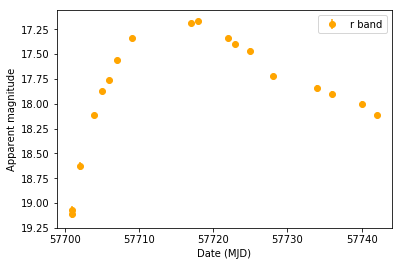

In [19]:
f, ax = plt.subplots()

plt.errorbar(date_to_MJD(r_band['date']), r_band['mag'], yerr = r_band['emag'],label = 'r band', fmt='o', color= 'orange')

ax.invert_yaxis()
plt.xlabel('Date (MJD)')
plt.ylabel('Apparent magnitude')
plt.legend()
plt.show()

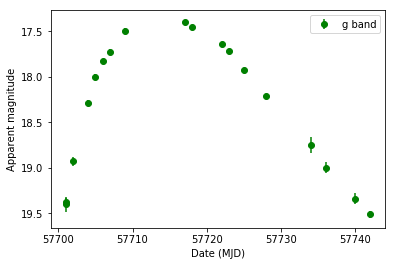

In [20]:
f, ax = plt.subplots()
plt.errorbar(date_to_MJD(g_band['date']), g_band['mag'], yerr = g_band['emag'],label = 'g band', fmt='o', color='green')

ax.invert_yaxis()
plt.xlabel('Date (MJD)')
plt.ylabel('Apparent magnitude')
plt.legend()
plt.show()

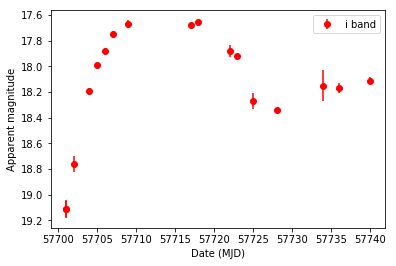

In [21]:
f, ax = plt.subplots()
plt.errorbar(date_to_MJD(i_band['date']), i_band['mag'], yerr = i_band['emag'],label = 'i band', fmt='o', color='red')

ax.invert_yaxis()
plt.xlabel('Date (MJD)')
plt.ylabel('Apparent magnitude')
plt.legend()
plt.show()

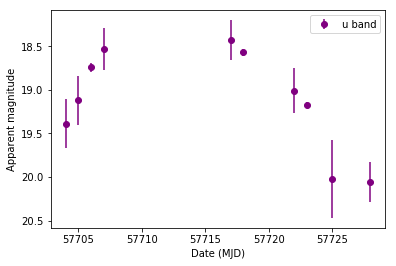

In [22]:
#filter values with super high errorbars
good_vals = np.where(u_band['mag'] != 99)
u_band = u_band.iloc[good_vals]


f, ax = plt.subplots()
plt.errorbar(date_to_MJD(u_band['date']), u_band['mag'], yerr = u_band['emag'],label = 'u band', fmt='o', color='purple')

ax.invert_yaxis()
plt.xlabel('Date (MJD)')
plt.ylabel('Apparent magnitude')
plt.legend()
plt.show()